### **Set Up**

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier

### **Uploading Data Set**

In [0]:
wildfire = pd.read_csv("/content/export_va_fire.csv", encoding="ISO-8859-1")
wildfire = wildfire[['DISCOVERY_DOY', 'CONT_DOY', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'STAT_CAUSE_CODE','FIRE_SIZE_CLASS']]
wildfire.head()

,DISCOVERY_DOY,CONT_DOY,LATITUDE,LONGITUDE,OWNER_CODE,STAT_CAUSE_CODE,FIRE_SIZE_CLASS
0,78,87.0,38.557778,-79.071667,5.0,7.0,D
1,89,89.0,38.300000,-79.383333,5.0,7.0,B
2,93,94.0,38.741389,-79.029444,13.0,9.0,C
3,99,99.0,36.854722,-82.447778,5.0,7.0,A
4,148,149.0,37.760278,-80.201944,13.0,9.0,B


In [0]:
wildfire.dtypes

DISCOVERY_DOY        int64
CONT_DOY           float64
LATITUDE           float64
LONGITUDE          float64
OWNER_CODE         float64
STAT_CAUSE_CODE    float64
FIRE_SIZE_CLASS     object
dtype: object

In [0]:
wildfire['DURATION'] = wildfire['CONT_DOY'] - wildfire['DISCOVERY_DOY']
wildfire = wildfire.drop(['CONT_DOY'], axis=1)
wildfire = wildfire.dropna()

In [0]:
wildfire = wildfire.astype({'DURATION': 'int64'})

In [0]:
from sklearn.preprocessing import LabelEncoder
wildfire_cat = wildfire["FIRE_SIZE_CLASS"]
le = LabelEncoder()
wildfire_cat1 = le.fit_transform(wildfire_cat)
wildfire["FIRE_SIZE_CLASS"] = wildfire_cat1
wildfire.head()

,DISCOVERY_DOY,LATITUDE,LONGITUDE,OWNER_CODE,STAT_CAUSE_CODE,FIRE_SIZE_CLASS,DURATION
0,78,38.557778,-79.071667,5.0,7.0,3,9
1,89,38.300000,-79.383333,5.0,7.0,1,0
2,93,38.741389,-79.029444,13.0,9.0,2,1
3,99,36.854722,-82.447778,5.0,7.0,0,0
4,148,37.760278,-80.201944,13.0,9.0,1,1


In [0]:
wildfire.dtypes

DISCOVERY_DOY        int64
LATITUDE           float64
LONGITUDE          float64
OWNER_CODE         float64
STAT_CAUSE_CODE    float64
FIRE_SIZE_CLASS      int64
DURATION             int64
dtype: object

### **Visualization**

In [0]:
corr_matrix = wildfire.corr()
corr_matrix['FIRE_SIZE_CLASS'].sort_values(ascending=False)

FIRE_SIZE_CLASS    1.000000
DURATION           0.446424
DISCOVERY_DOY      0.032376
STAT_CAUSE_CODE   -0.006211
LATITUDE          -0.066038
OWNER_CODE        -0.108094
LONGITUDE         -0.187061
Name: FIRE_SIZE_CLASS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa933beeb8>,
      dtype=object)

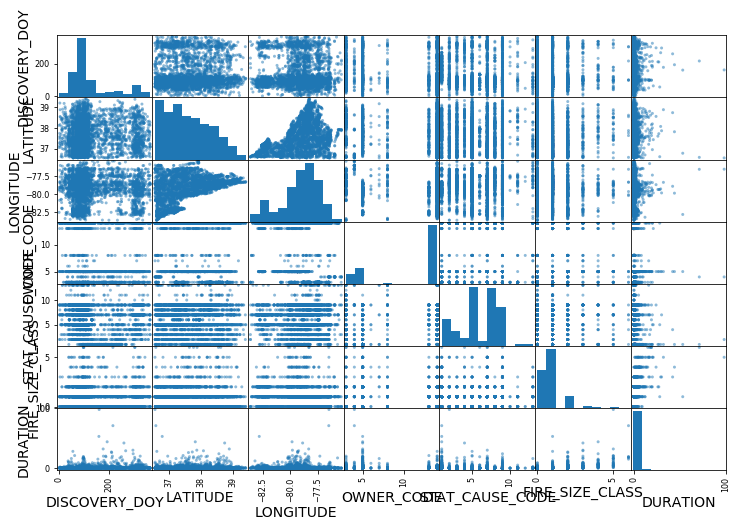

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(wildfire, figsize=(12, 8))

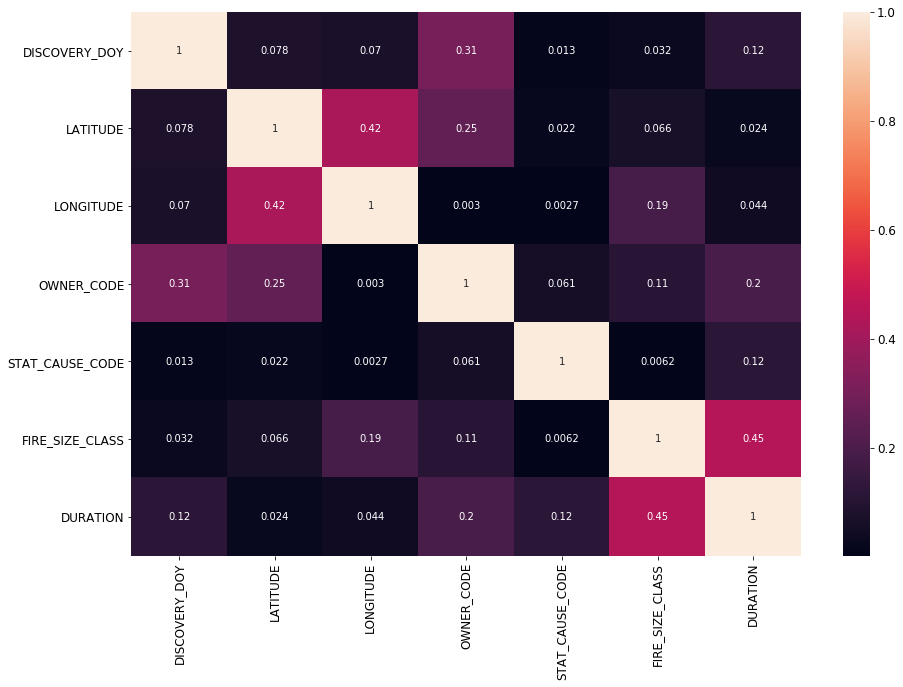

In [0]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(wildfire.corr().abs(),  annot=True)

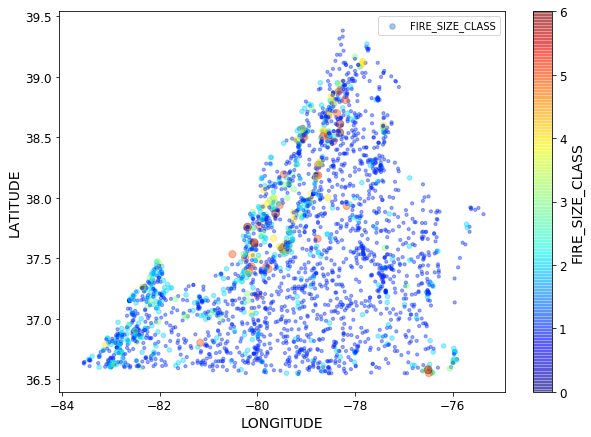

In [0]:
import matplotlib.pyplot as plt

x = wildfire["LONGITUDE"]
y = wildfire["LATITUDE"]
wildfire.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", s=wildfire["FIRE_SIZE_CLASS"]*10,label="FIRE_SIZE_CLASS", figsize=(10,7), c="FIRE_SIZE_CLASS",cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False, alpha = 0.4)
plt.legend()
plt.show()

### **Training Models**

In [0]:
from sklearn.model_selection import train_test_split
X = wildfire[['LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'STAT_CAUSE_CODE', 'DURATION','DISCOVERY_DOY']]
y = wildfire['FIRE_SIZE_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### **RBF SVM - supervised**

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier

In [0]:

tuned_parameters_rbf = {'ovr_svm_clf_rbf__estimator__gamma': [0.01, 0.001, 0.1, 1],
                     'ovr_svm_clf_rbf__estimator__C': [1, 50, 0.1]}
svm_clf_rbf = SVC(kernel='rbf', random_state=42)
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("ovr_svm_clf_rbf", OneVsRestClassifier(svm_clf_rbf))
])
clf = GridSearchCV(rbf_kernel_svm_clf, tuned_parameters_rbf, cv=5,
                       scoring="accuracy")
clf.fit(X_train, y_train)
clf.best_params_

{'ovr_svm_clf_rbf__estimator__C': 50, 'ovr_svm_clf_rbf__estimator__gamma': 0.1}

In [0]:

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("ovr_svm_clf", OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma = 1, random_state = 42)))
])
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ovr_svm_clf',
                 OneVsRestClassifier(estimator=SVC(C=1, cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_function_shape='ovr',
                                                   degree=3, gamma=1,
                                                   kernel='rbf', max_iter=-1,
                                                   probability=False,
                                                   random_state=42,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                     n_jobs=None))],
         verbose=False)

In [0]:
y_pred_rbf = rbf_kernel_svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_rbf)

0.6020408163265306

### **Polynomial SVM - supervised**

In [0]:
tuned_parameters_poly = {'ovr_svm_clf_poly__estimator__degree': [3, 5],
                        'ovr_svm_clf_poly__estimator__C': [50, 1],
                        'ovr_svm_clf_poly__estimator__gamma': [0.5, 0.1, 0.05]}
svm_clf_poly = SVC(kernel='poly', random_state=42, coef0=1)
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("ovr_svm_clf_poly", OneVsRestClassifier(svm_clf_poly))
])
poly_clf = GridSearchCV(poly_kernel_svm_clf, tuned_parameters_poly, cv=3,
                       scoring="accuracy")
poly_clf.fit(X_train, y_train)
poly_clf.best_params_

{'ovr_svm_clf_poly__estimator__C': 50,
 'ovr_svm_clf_poly__estimator__degree': 5,
 'ovr_svm_clf_poly__estimator__gamma': 0.05}

In [0]:
cvres = poly_clf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.5340909090909091 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 3, 'ovr_svm_clf_poly__estimator__gamma': 0.005}
0.5372159090909091 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 3, 'ovr_svm_clf_poly__estimator__gamma': 0.01}
0.5372159090909091 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 3, 'ovr_svm_clf_poly__estimator__gamma': 0.05}
0.537784090909091 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 5, 'ovr_svm_clf_poly__estimator__gamma': 0.005}
0.5386363636363637 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 5, 'ovr_svm_clf_poly__estimator__gamma': 0.01}
0.5394886363636363 {'ovr_svm_clf_poly__estimator__C': 50, 'ovr_svm_clf_poly__estimator__degree': 5, 'ovr_svm_clf_poly__estimator__gamma': 0.05}
0.53125 {'ovr_svm_clf_poly__estimator__C': 1, 'ovr_svm_clf_poly__estimator__degree': 3, 'ovr_svm_clf_poly__estimator__gamma': 0.005}
0.

In [0]:

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("ovr_svm_clf", OneVsRestClassifier(SVC(kernel='poly',degree=3, coef0=1, C=50, random_state=42, gamma=0.05)))
])
poly_kernel_svm_clf.fit(X_train, y_train)
y_pred = poly_kernel_svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5790816326530612

### **Decision Tree - supervised**

In [0]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

tree_clf = DecisionTreeClassifier(max_depth=4,random_state=42)

tree_clf_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("tree_clf_pip", tree_clf)
])

tree_clf_pip.fit(X_train, y_train)
pred = tree_clf_pip.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.5867346938775511

### **Tunning for Decision Tree**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = { 'min_samples_split': [2, 3, 4],
           'max_depth':list(range(1,32)),
           'max_features':['auto', 'sqrt'],
           'min_samples_split':[2, 5, 7, 10],
           'min_samples_leaf': [1, 2, 3, 4],
         }

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params,cv=5,scoring="accuracy")
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 1

In [0]:
print("best: ", grid_search_cv.best_estimator_)

In [0]:
tree_clf_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("ovr_svm_clf", grid_search_cv.best_estimator_)
])
tree_clf_pip.fit(X_train, y_train)
y_pred = tree_clf_pip.predict(X_test)
accuracy_score(y_test, y_pred)

0.5892857142857143

### **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

RF_clf_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("RF_pip", RandomForestClassifier(n_estimators=20, random_state=0))
])

RF_clf_pip.fit(X_train,y_train)
y_pred = RF_clf_pip.predict(X_test)
# confusion_matrix(y_test,y_pred)
accuracy_score(y_test, y_pred)

0.5918367346938775

### **Random Forest Tuning**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

params = {'bootstrap': [True, False],
          'max_depth': [10, 30, 50, 70, 90, 100, None],
          'max_features': ['auto'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [20, 200, 400, 600, 800]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params,cv=5,scoring="accuracy")
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
print("best: ", grid_search_cv.best_estimator_)

best:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

RF_clf_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("RF_pip", grid_search_cv.best_estimator_)
])

RF_clf_pip.fit(X_train,y_train)
y_pred = RF_clf_pip.predict(X_test)
# confusion_matrix(y_test,y_pred)
accuracy_score(y_test, y_pred)

0.6479591836734694

### **Artifical Neural Network**

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.__version__

'1.15.0'

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
from sklearn.model_selection import train_test_split
X = wildfire[['LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'STAT_CAUSE_CODE', 'DURATION','DISCOVERY_DOY']]
y = wildfire['FIRE_SIZE_CLASS']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
np.random.seed(42)
tf.random.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(50),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(30),
    keras.layers.BatchNormalization(), 
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=1e-3, momentum=0.7),metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 2640 samples, validate on 880 samples
Epoch 1/30
2640/2640 [==============================] - 1s 378us/sample - loss: 2.0516 - acc: 0.3284 - val_loss: 1.9498 - val_acc: 0.5273
Epoch 2/30
2640/2640 [==============================] - 0s 95us/sample - loss: 1.6884 - acc: 0.4883 - val_loss: 1.6837 - val_acc: 0.5409
Epoch 3/30
2640/2640 [==============================] - 0s 100us/sample - loss: 1.5110 - acc: 0.5155 - val_loss: 1.5020 - val_acc: 0.5295
Epoch 4/30
2640/2640 [==============================] - 0s 92us/sample - loss: 1.3892 - acc: 0.5258 - val_loss: 1.3835 - val_acc: 0.5295
Epoch 5/30
2640/2640 [==============================] - 0s 93us/sample - loss: 1.2984 - acc: 0.5326 - val_loss: 1.2789 - val_acc: 0.5500
Epoch 6/30
2640/2640 [==============================] - 0s 91us/sample - loss: 1.2329 - acc: 0.5436 - val_loss: 1.2127 - val_acc: 0.5511
Epoch 7/30
2640/2640 [==========================

[0.9219531745326762, 0.60714287]

In [0]:
#PReLU

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

#learning rate, exponential decay
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=1e-3, momentum=0.7),metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[lr_scheduler])
model.evaluate(X_test, y_test)

Train on 2640 samples, validate on 880 samples
Epoch 1/100
2640/2640 [==============================] - 0s 120us/sample - loss: 1.2305 - acc: 0.4811 - val_loss: 1.0094 - val_acc: 0.5250
Epoch 2/100
2640/2640 [==============================] - 0s 69us/sample - loss: 1.0132 - acc: 0.5254 - val_loss: 0.9902 - val_acc: 0.5216
Epoch 3/100
2640/2640 [==============================] - 0s 71us/sample - loss: 0.9829 - acc: 0.5356 - val_loss: 0.9538 - val_acc: 0.5636
Epoch 4/100
2640/2640 [==============================] - 0s 74us/sample - loss: 0.9580 - acc: 0.5458 - val_loss: 0.9471 - val_acc: 0.5716
Epoch 5/100
2640/2640 [==============================] - 0s 65us/sample - loss: 0.9444 - acc: 0.5504 - val_loss: 0.9603 - val_acc: 0.5386
Epoch 6/100
2640/2640 [==============================] - 0s 68us/sample - loss: 0.9271 - acc: 0.5621 - val_loss: 0.9724 - val_acc: 0.5432
Epoch 7/100
2640/2640 [==============================] - 0s 71us/sample - loss: 0.9173 - acc: 0.5720 - val_loss: 0.9430 - va

[0.8717075489005264, 0.6147959]